In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [5]:
def get_lower_and_upper_bouns(series, multiplier=1.5):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    lb = q1 - (multiplier * iqr)
    ub = q3 + (multiplier * iqr)
    return lb, ub

Use the IQR Range Rule and the lower and upper bounds to identify the outliers of each column of lemonade.csv, using the multiplier of 1.5.

In [19]:
url = ("https://gist.githubusercontent.com/ryanorsinger/"
       "19bc7eccd6279661bd13307026628ace/"
       "raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")

df = pd.read_csv(url)

In [20]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [21]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(col, get_lower_and_upper_bouns(df[col], multiplier=1.5))

Temperature (16.700000000000003, 104.7)
Rainfall (0.26, 1.3)
Flyers (4.0, 76.0)
Price (0.5, 0.5)
Sales (5.0, 45.0)


Do the outliers make sense? Which outliers should be kept?
- The outlier bounds make sense but as you get further from them, they become unreasonable.

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers in each column of lemonade.csv.

In [23]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(col, get_lower_and_upper_bouns(df[col], multiplier=3))

Temperature (-16.299999999999997, 137.7)
Rainfall (-0.13, 1.69)
Flyers (-23.0, 103.0)
Price (0.5, 0.5)
Sales (-10.0, 60.0)


Do the outliers make sense? Which outliers should be kept?
- Most of the outlier bounds are not evven reasonable

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Outside of outliers, the distributions seem normally distributedd

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
- The outliers don't make sense and are unreasonable

Should certain outliers be kept or removed?

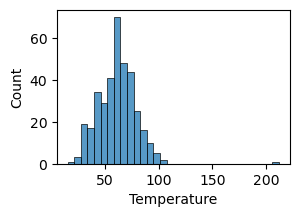

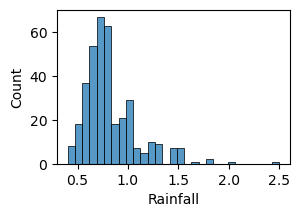

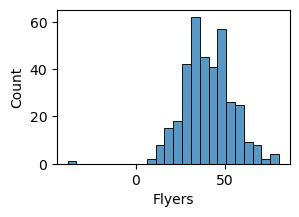

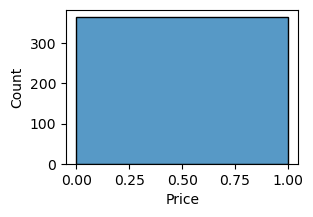

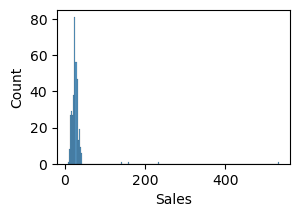

In [28]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        plt.figure(figsize=(3,2))
        sns.histplot(df[col])
        plt.show()

In [36]:
# Calculate the z-score 
zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())

# Finds all of the observations two standard deviations or more.
df[col][zscores.abs() >= 2]

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [37]:
# Finds all of the observations three standard deviations or more
df[col][zscores.abs() >= 3]

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64